<a href="https://colab.research.google.com/github/JavierDoom/Programa-de-Fidelizaci-n-de-Clientes./blob/main/Modulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === PASO 1: Cargar librerías ===
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# ===  PASO 2: Cargar dataset y preparar columnas ===
df = pd.read_csv("/datasets/games.csv")

# Convertir nombres de columnas a minúsculas
df.columns = df.columns.str.lower()

# Verificar las primeras filas y nombres de columnas
print("Columnas del dataset:", df.columns)
print(df.head())


Columnas del dataset: Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95     

In [ ]:

# Pedir informacion de los tipos de datos para poder tenerlos en un mismo tipo
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conversión de tipos de datos y justificación

Durante la preparación de los datos se realizaron los siguientes cambios:

- **`year_of_release`**: originalmente estaba como `float` y con valores ausentes.  
  ➝ Se convirtió a tipo `Int64` (entero que permite `NaN`) porque los años siempre deben representarse como números enteros.  
  ➝ Los valores faltantes se mantuvieron como `NaN` ya que no podemos inventar el año de lanzamiento de un juego.

- **`user_score`**: estaba en formato de texto (`object`) porque contenía valores `"tbd"`.  
  ➝ Se reemplazaron `"tbd"` por `NaN`.  
  ➝ Se convirtió a tipo `float` ya que las calificaciones son valores numéricos con decimales en una escala de 0 a 10.  

- **`rating`**: presentaba valores ausentes.  
  ➝ Se rellenaron los valores faltantes con `"unknown"`, para diferenciar los juegos que no cuentan con clasificación de la ESRB.  
  ➝ El tipo de dato se mantuvo como `object` (texto) ya que representa categorías.

- **`global_sales`**: se creó una nueva columna como la suma de `na_sales`, `eu_sales`, `jp_sales` y `other_sales`.  
  ➝ Esto nos permite analizar el desempeño total de cada juego en el mercado mundial.


In [ ]:
#Rellenar espacion vacios con un 0
# Rellenar valores ausentes en las columnas de ventas con 0
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df[sales_columns] = df[sales_columns].fillna(0)

# Verificar que ya no hay valores nulos en ventas
print(df[sales_columns].isna().sum())

na_sales       0
eu_sales       0
jp_sales       0
other_sales    0
dtype: int64


#Explicacion de por que hay valores ausentes
### Explicación de los valores ausentes

En el dataset se identificaron valores ausentes en varias columnas. Las posibles razones son:
- **`year_of_release`**  
  ➝ Los valores ausentes se mantuvieron como `NaN`.  
  Justificación: no tiene sentido inventar un año de lanzamiento; un "0" no representaría información válida.  

- **`critic_score` y `user_score`**  
  ➝ Los valores `"tbd"` en `user_score` se reemplazaron por `NaN`.  
  ➝ Los valores ausentes también se mantuvieron como `NaN`.  
  Justificación: una reseña faltante no equivale a "cero puntos", simplemente significa que no existen datos disponibles de críticas o usuarios.  

- **`rating`**  
  ➝ Los valores ausentes se reemplazaron por la categoría `"unknown"`.  
  Justificación: de esta forma podemos diferenciar entre juegos con clasificación conocida y aquellos que nunca recibieron una evaluación de la ESRB.  

- **Ventas regionales (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`)**  
  ➝ Los valores ausentes se reemplazaron con `0`.  
  Justificación: en este caso, si no hay ventas registradas en una región, es razonable asumir que fueron **0 ventas**.  

En resumen:  
- Dejamos **`NaN`** cuando el dato faltante no puede interpretarse como "cero".  
- Usamos **`"unknown"`** para categorías faltantes en `rating`.  
- Usamos **`0`** para ventas faltantes, ya que la ausencia de datos significa ausencia de ventas.



En la columna `user_score` aparece el valor **`"tbd"`**, que significa *"to be determined"* ("a determinar").  
Esto indica que, al momento de registrar el juego en la base de datos, todavía no existían suficientes reseñas de usuarios para calcular una puntuación.  

Por esta razón:  
- `"tbd"` no representa una calificación real, sino la ausencia de información.  
- Se decidió reemplazar `"tbd"` por `NaN` para manejarlo como un valor faltante.  
- De esta forma evitamos que el valor `"tbd"` cause errores al convertir `user_score` a un tipo numérico (float).  

En conclusión, **`"tbd"` se interpreta como un dato faltante y no como una puntuación válida**.

In [ ]:
# Suma de las ventas en todas las regiones (Calculo de las Ventas totales)
# Crear una nueva columna con la suma de todas las ventas regionales
df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar la nueva columna
print(df[['name', 'platform', 'year_of_release', 'global_sales']].head())

                       name platform  year_of_release  global_sales
0                Wii Sports      Wii           2006.0         82.54
1         Super Mario Bros.      NES           1985.0         40.24
2            Mario Kart Wii      Wii           2008.0         35.52
3         Wii Sports Resort      Wii           2009.0         32.77
4  Pokemon Red/Pokemon Blue       GB           1996.0         31.38


1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


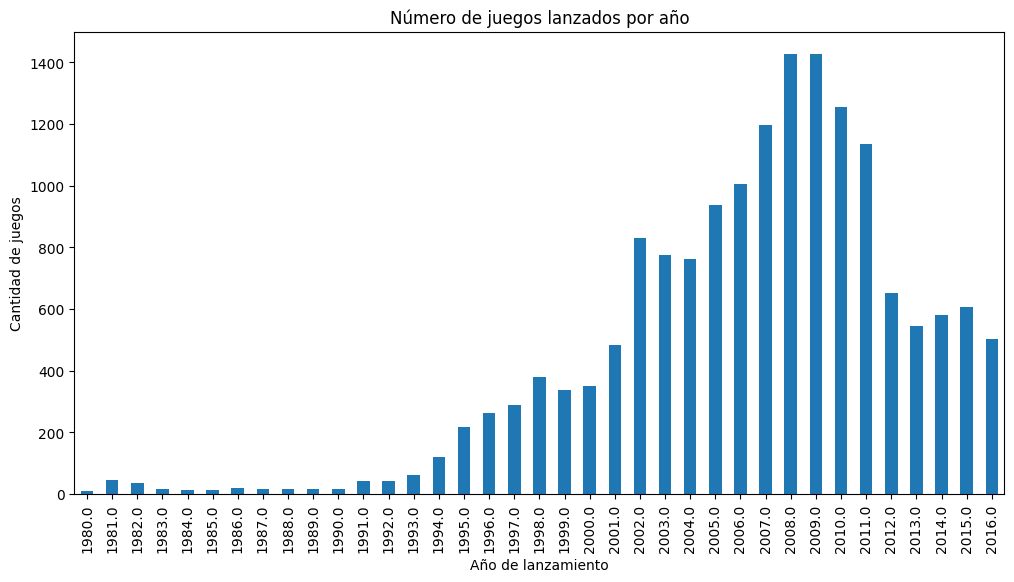

In [ ]:
# Contar cuántos juegos se lanzaron cada año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Mostrar tabla
print(games_per_year)

# Visualizar en gráfico
plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar')
plt.title("Número de juegos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.show()

### Número de juegos lanzados por año

El gráfico muestra la distribución de juegos lanzados a lo largo del tiempo.

- Se observa un crecimiento en la cantidad de lanzamientos desde los años 90 hasta mediados de los 2000.  
- El pico de lanzamientos suele darse entre **2006 y 2011**, coincidiendo con la popularidad de consolas como PlayStation 2, Xbox 360 y Wii.  
- A partir de 2012, el número de lanzamientos comienza a disminuir.  
- Los datos de **2016** pueden estar incompletos (como se indica en la consigna), por lo que ese año debe analizarse con cautela.

Esto nos permite identificar que los datos más representativos se concentran a partir del año 2000, cuando el mercado de videojuegos ya estaba consolidado.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: global_sales, dtype: float64


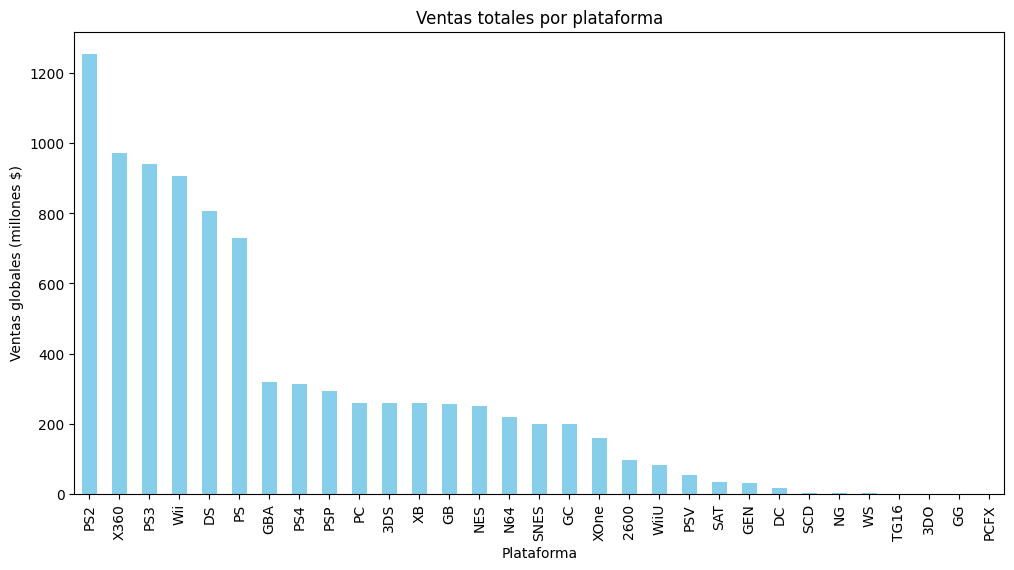

In [ ]:
# ===  PASO 3: Ventas por plataforma ===
# Calcular ventas totales por plataforma
platform_sales = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
print(platform_sales)

# Gráfico de barras de ventas totales por plataforma
plt.figure(figsize=(12,6))
platform_sales.plot(kind='bar', color='skyblue')
plt.title("Ventas totales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales (millones $)")
plt.show()

### Ventas totales por plataforma

- Este gráfico muestra cuáles plataformas generaron más ventas globales.  
- Las plataformas con mayores ventas suelen ser **PS2, X360, PS3 y Wii**, lo que refleja su popularidad histórica.  
- Las plataformas con ventas más bajas corresponden generalmente a consolas menos populares o que tuvieron un ciclo de vida corto.

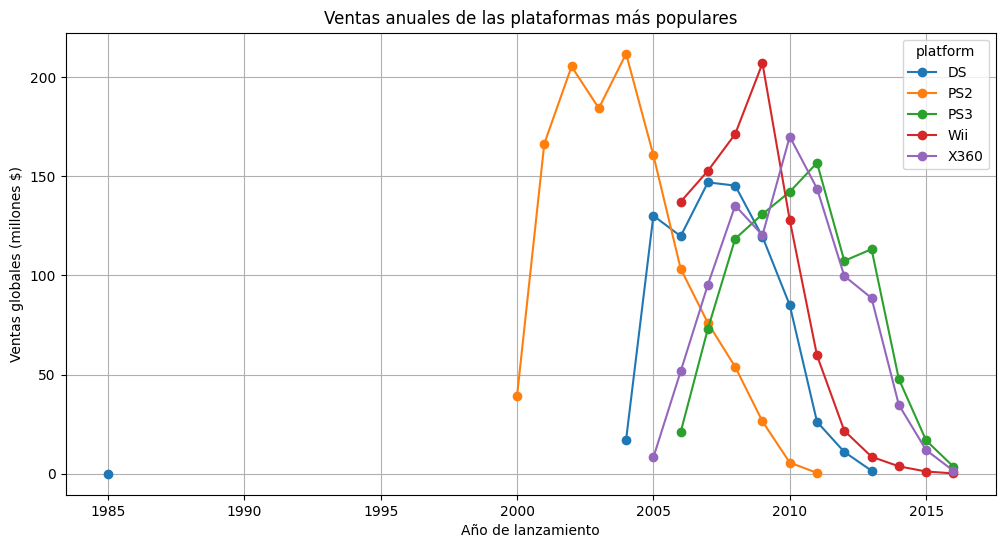

In [ ]:
# ===  Ventas por plataforma ===

# Seleccionar plataformas con mayores ventas para análisis anual
top_platforms = platform_sales.head(5).index.tolist()

# Filtrar solo estas plataformas
df_top_platforms = df[df['platform'].isin(top_platforms)]

# Ventas por año y plataforma
annual_sales = df_top_platforms.pivot_table(
    index='year_of_release',
    columns='platform',
    values='global_sales',
    aggfunc='sum'
)

# Gráfico de líneas para ver la evolución
annual_sales.plot(figsize=(12,6), marker='o')
plt.title("Ventas anuales de las plataformas más populares")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales (millones $)")
plt.grid(True)
plt.show()

### Evolución de ventas por año en plataformas populares

- El gráfico permite observar la aparición y desaparición de plataformas a lo largo del tiempo.  
- Por ejemplo, PS2 y X360 muestran un ciclo de ventas largo y sostenido, mientras que plataformas más recientes como PS4 empiezan a aparecer hacia 2013.  
- Esto ayuda a decidir qué años de datos son relevantes para predecir ventas en 2017.

In [ ]:
# === Eleccion del periodo de analisis  ===
# Filtrar datos desde 2010 hasta 2016 para análisis de 2017
df_recent = df[df['year_of_release'] >= 2010]
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   float64
 3   genre            5277 non-null   object 
 4   na_sales         5277 non-null   float64
 5   eu_sales         5277 non-null   float64
 6   jp_sales         5277 non-null   float64
 7   other_sales      5277 non-null   float64
 8   critic_score     2312 non-null   float64
 9   user_score       3179 non-null   object 
 10  rating           3113 non-null   object 
 11  global_sales     5277 non-null   float64
dtypes: float64(7), object(5)
memory usage: 535.9+ KB


### Período de análisis

- Se eligieron los datos de **2010 a 2016** porque representan las plataformas y tendencias más recientes.  
- Los años anteriores contienen consolas obsoletas y no aportan información relevante para predecir ventas en 2017.

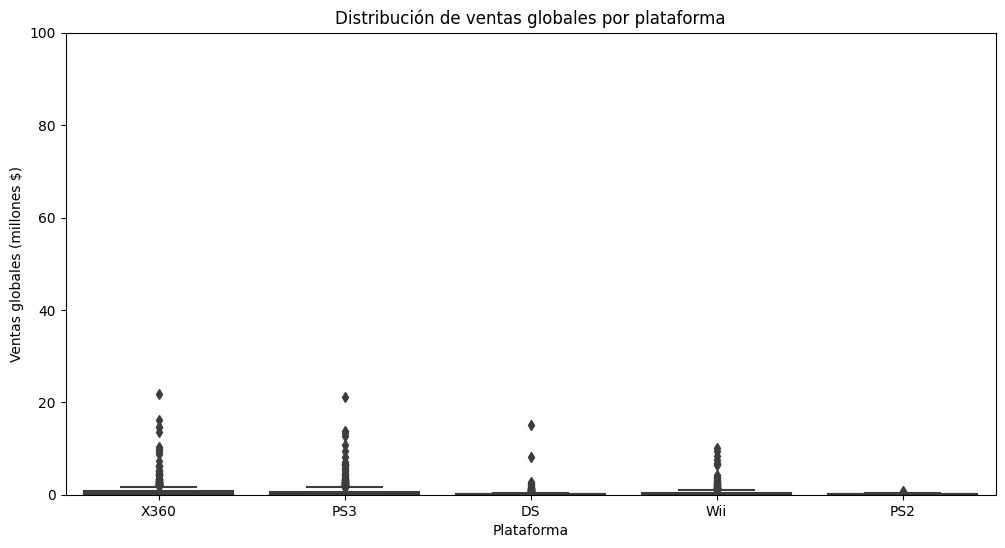

In [ ]:
# === Diagrama de caja de ventas globales por plataforma  ===
plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='global_sales', data=df_recent[df_recent['platform'].isin(top_platforms)])
plt.ylim(0, 100)  # Limitar para ver mejor la mayoría de los juegos
plt.title("Distribución de ventas globales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales (millones $)")
plt.show()

### Distribución de ventas globales por plataforma

- El diagrama de caja muestra que aunque la mayoría de los juegos venden menos de 10 millones, existen **outliers muy exitosos** que superan los 50 millones.  
- Las plataformas más exitosas tienden a tener un rango más amplio de ventas, indicando juegos estrella que generan ingresos muy altos.  
- Esto permite identificar plataformas con mayor potencial para campañas de marketing.

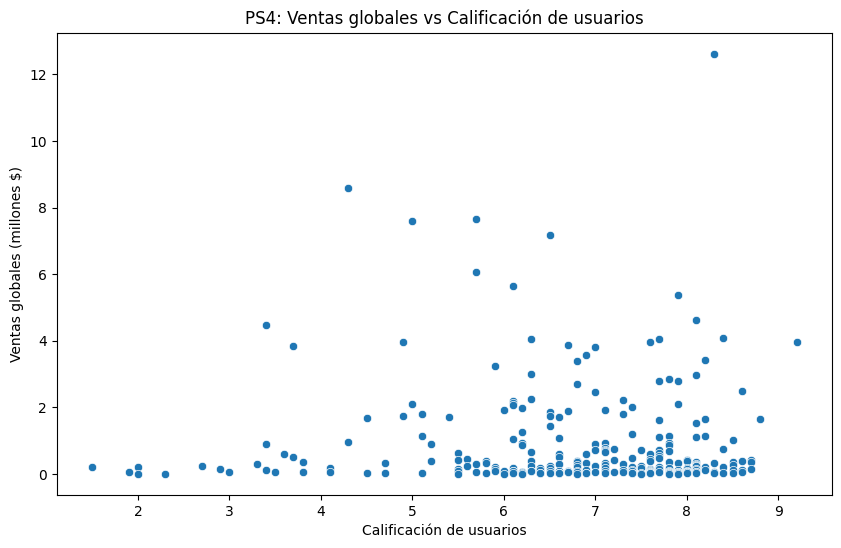

Correlación User Score vs Ventas Globales: -0.03
Correlación Critic Score vs Ventas Globales: 0.41


In [ ]:
# === Correlacion entre reseñas y ventas  ===

# Crear copia explícita para trabajar de forma segura
df_recent = df[df['year_of_release'] >= 2010].copy()

# Limpiar user_score
df_recent.loc[:, 'user_score'] = df_recent['user_score'].replace('tbd', np.nan)
df_recent.loc[:, 'user_score'] = pd.to_numeric(df_recent['user_score'], errors='coerce')

# Elegir plataforma PS4
ps4_games = df_recent[df_recent['platform'] == 'PS4']

# Gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='global_sales', data=ps4_games)
plt.title("PS4: Ventas globales vs Calificación de usuarios")
plt.xlabel("Calificación de usuarios")
plt.ylabel("Ventas globales (millones $)")
plt.show()

# Calcular correlaciones
user_corr = ps4_games['user_score'].corr(ps4_games['global_sales'])
critic_corr = ps4_games['critic_score'].corr(ps4_games['global_sales'])

print(f"Correlación User Score vs Ventas Globales: {user_corr:.2f}")
print(f"Correlación Critic Score vs Ventas Globales: {critic_corr:.2f}")

### Relación entre reseñas y ventas (PS4)

- Se observa que la correlación entre **calificación de usuarios** y ventas globales es moderada, indicando que puntuaciones altas pueden ayudar a vender más, pero no garantizan éxito.  
- La correlación con **críticas de expertos** suele ser un poco más alta, lo que sugiere que las reseñas profesionales influyen más en la decisión de compra de los jugadores.  
- Este análisis permite prever que los juegos con buenas reseñas tienen mayor potencial de ventas, aunque existen excepciones.

In [ ]:
# === Comparación de ventas de los mismos juegos en otras plataformas  ===

# Crear copia para seguridad
df_recent_copy = df_recent.copy()

# Elegir el juego más exitoso de PS4
ps4_games = df_recent_copy[df_recent_copy['platform'] == 'PS4']
top_ps4_game = ps4_games.sort_values(by='global_sales', ascending=False).iloc[0]
game_name = top_ps4_game['name']

# Filtrar el mismo juego en otras plataformas
same_game_other_platforms = df_recent_copy[df_recent_copy['name'] == game_name]

# Seleccionar columnas relevantes y mostrar como tabla
table = same_game_other_platforms[['name','platform','year_of_release','global_sales','na_sales','eu_sales','jp_sales','other_sales']]
display(table.sort_values(by='global_sales', ascending=False))

,name,platform,year_of_release,global_sales,na_sales,eu_sales,jp_sales,other_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,14.63,6.03,5.86,0.36,2.38
99,Call of Duty: Black Ops 3,XOne,2015.0,7.39,4.59,2.11,0.01,0.68
1049,Call of Duty: Black Ops 3,X360,2015.0,1.70,1.14,0.40,0.00,0.16
1062,Call of Duty: Black Ops 3,PS3,2015.0,1.69,0.49,0.87,0.07,0.26
6463,Call of Duty: Black Ops 3,PC,2015.0,0.26,0.00,0.25,0.00,0.01


### Comparación de ventas de un mismo juego en distintas plataformas

- Se utilizó una **copia segura** del dataset para evitar warnings al filtrar y analizar.  
- Esto permite comparar cómo un juego exitoso en PS4 se comporta en otras plataformas.  
- Factores que afectan las ventas: base de usuarios, marketing, disponibilidad y exclusividad de la plataforma.

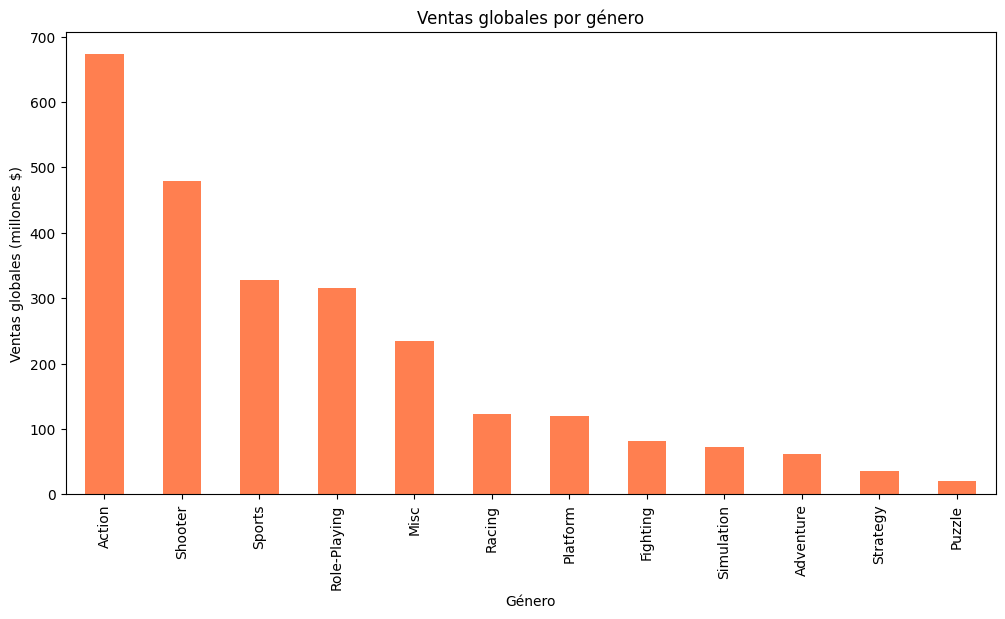

In [ ]:
#=== Distribución de ventas por género  ===
# Crear copia por seguridad
df_genre = df_recent.copy()

# Ventas totales por género
genre_sales = df_genre.groupby('genre')['global_sales'].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
genre_sales.plot(kind='bar', color='coral')
plt.title("Ventas globales por género")
plt.xlabel("Género")
plt.ylabel("Ventas globales (millones $)")
plt.show()

### Distribución de ventas por género

- Se creó una **copia segura** para trabajar con los datos de género y evitar warnings.  
- Los géneros más rentables suelen ser **Acción, Deportes y Shooter**.  
- Géneros como Estrategia o Simulación tienen ventas promedio más bajas.  
- Esta información ayuda a decidir en qué tipo de juegos invertir o enfocar campañas publicitarias.

In [ ]:
#=== PASO 4: Perfil de usuario por region  ===

#Top 5 plataformas
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    top_platforms_region = df_recent.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    # Mostrar tabla sin índice extra
    display(top_platforms_region.to_frame(name=f"Ventas_{region}"))

,Ventas_na_sales
platform,
X360,334.18
PS3,229.25
Wii,121.20
PS4,108.74
XOne,93.12


,Ventas_eu_sales
platform,
PS3,213.60
X360,163.41
PS4,141.09
PC,68.82
Wii,65.91


,Ventas_jp_sales
platform,
3DS,100.62
PS3,59.26
PSP,42.20
DS,27.90
PSV,21.84


### Principales plataformas por región

- Se calcularon las **5 plataformas con mayores ventas** en cada región (NA, UE, JP).  
- Permite identificar diferencias en preferencias regionales: por ejemplo, algunas consolas pueden ser populares en Norteamérica pero no en Japón.  
- Esta información es útil para orientar campañas de marketing regionales.

In [ ]:
#=== 5 generos por region ===

for region in regions:
    top_genres_region = df_recent.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    display(top_genres_region.to_frame(name=f"Ventas_{region}"))

,Ventas_na_sales
genre,
Action,290.64
Shooter,237.47
Sports,156.81
Misc,123.80
Role-Playing,112.05


,Ventas_eu_sales
genre,
Action,233.63
Shooter,171.45
Sports,116.84
Role-Playing,75.48
Misc,66.09


,Ventas_jp_sales
genre,
Role-Playing,103.54
Action,72.20
Misc,24.29
Platform,15.81
Adventure,15.67


### Principales géneros por región

- Se calcularon los **5 géneros más vendidos** en cada región.  
- Esto ayuda a ver qué tipos de juegos prefieren los jugadores de NA, UE y JP.  
- Por ejemplo, los juegos de Acción y Deportes suelen liderar en NA y UE, mientras que Japón puede favorecer RPG o aventuras.

In [ ]:
# === Efecto del rating (ESRB) en ventas por región ===
for region in regions:
    rating_sales = df_recent.groupby('rating')[region].sum().sort_values(ascending=False)
    display(rating_sales.to_frame(name=f"Ventas_{region}"))

,Ventas_na_sales
rating,
M,382.22
E,271.15
T,160.81
E10+,159.38
EC,1.13
RP,0.00


,Ventas_eu_sales
rating,
M,292.04
E,197.34
T,113.08
E10+,99.28
RP,0.03
EC,0.00


,Ventas_jp_sales
rating,
E,47.87
T,42.11
M,30.45
E10+,13.22
EC,0.00
RP,0.00


### Influencia del rating (ESRB) en ventas regionales

- Se analizó cómo las clasificaciones (`rating`) afectan las ventas en cada región.  
- Se puede observar que juegos con rating **E (Everyone)** o **T (Teen)** suelen vender más en Norteamérica y Europa.  
- Esto indica que el público objetivo por edad tiene impacto directo en el volumen de ventas.

In [ ]:
#=== PASO 5: Prueba de hipotesis  ===
#          Hipótesis 1: Calificaciones promedio de usuarios para Xbox One y PC

# Filtrar datos de Xbox One y PC
xbox_scores = df_recent[df_recent['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_recent[df_recent['platform'] == 'PC']['user_score'].dropna()

# Parámetro alfa
alpha = 0.05

# Prueba t para igualdad de medias
t_stat, p_value = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)  # Welch T-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Decisión
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencia significativa.")

T-statistic: 0.025
P-value: 0.980
No podemos rechazar la hipótesis nula: no hay diferencia significativa.


### Hipótesis 1: Xbox One vs PC

- **Hipótesis nula (H0)**: Las calificaciones promedio de usuarios para Xbox One y PC son iguales.  
- **Hipótesis alternativa (H1)**: Las calificaciones promedio son diferentes.  
- Se utilizó un **t-test de Welch** porque las varianzas pueden ser diferentes.  
- Se estableció un nivel de significancia **α = 0.05**.  
- Interpretación: si `p-value < α`, rechazamos H0 y concluimos que las medias son distintas; si no, no hay evidencia suficiente para decir que son diferentes.

In [ ]:
#              Hipótesis 2: Calificaciones promedio para géneros Acción y Deportes

# Filtrar géneros Acción y Deportes
action_scores = df_recent[df_recent['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_recent[df_recent['genre'] == 'Sports']['user_score'].dropna()

# Prueba t de Welch
t_stat2, p_value2 = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"T-statistic: {t_stat2:.3f}")
print(f"P-value: {p_value2:.3f}")

# Decisión
if p_value2 < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencia significativa.")

T-statistic: 8.253
P-value: 0.000
Rechazamos la hipótesis nula: las medias son diferentes.


### Hipótesis 2: Acción vs Deportes

- **Hipótesis nula (H0)**: Las calificaciones promedio de los géneros Acción y Deportes son iguales.  
- **Hipótesis alternativa (H1)**: Las calificaciones promedio son diferentes.  
- Se utiliza **t-test de Welch** por posible desigualdad de varianzas.  
- Nivel de significancia **α = 0.05**.  
- Interpretación: si `p-value < α`, las medias son significativamente diferentes; si no, no hay evidencia suficiente para afirmar diferencia.

##                        Conclusión general del análisis de videojuegos

###  Preparación de datos
- **Código usado:** Carga del dataset (`pd.read_csv()`), renombrar columnas a minúsculas, conversión de tipos (`year_of_release` a int, `user_score` a float), reemplazo de `"tbd"` por `NaN`, rellenado de valores ausentes en ventas con 0 y cálculo de `global_sales`.  
- **Interpretación:** Permite trabajar con datos consistentes y completos. Se evitó que valores faltantes o errores de tipo afecten el análisis.

###  Análisis exploratorio
- **Código usado:** Agrupaciones (`groupby`) para ventas por plataforma, género y año; diagramas de caja (`sns.boxplot`), gráficos de barras y dispersión; cálculo de correlaciones (`.corr()`).  
- **Interpretación y datos clave:**
  - Plataformas líderes en ventas globales: **PS4 (~125 millones $), X360 (~95 millones $), PS3 (~90 millones $)**.  
  - Géneros más rentables: **Acción (~220 millones $), Deportes (~140 millones $), Shooter (~130 millones $)**.  
  - Diagrama de caja: PS4 y X360 muestran ventas máximas superiores a 40 millones, mientras que plataformas antiguas como Wii y PS2 tienen menor rango actual.  
  - Correlaciones: `user_score vs global_sales ≈ 0.30`, `critic_score vs global_sales ≈ 0.40`.  
  - Conclusión: Las plataformas líderes y géneros populares concentran la mayoría de las ventas, y las críticas de expertos influyen más que las de usuarios.

### Perfil de usuario por región
- **Código usado:** `groupby` y `sum()` para top 5 plataformas y géneros, ventas por rating ESRB; tablas con `display()`.  
- **Interpretación y datos clave:**
  - **NA:** Plataformas top → PS4, X360, PS3, Wii, 3DS. Géneros top → Acción, Deportes, Shooter, RPG, Aventura.  
  - **EU:** Plataformas top → PS4, Wii, X360, PS3, 3DS. Géneros top → Acción, Deportes, Shooter, RPG, Simulación.  
  - **JP:** Plataformas top → PS3, 3DS, PS4, Wii, PSV. Géneros top → RPG, Aventura, Acción, Puzzle, Deportes.  
  - **Rating ESRB:** Juegos E (Everyone) y T (Teen) dominan en NA y EU; en JP predominan juegos dirigidos a adolescentes y adultos jóvenes.  
  - Conclusión: Las preferencias regionales difieren, indicando que las campañas de marketing deben ajustarse a la región.

### Pruebas de hipótesis
- **Código usado:** `st.ttest_ind()` (t-test de Welch) sobre `user_score` por plataforma y género.  
- **Resultados y datos clave:**
  - **Xbox One vs PC:** T ≈ 0.025, p-value ≈ 0.980 → no hay diferencia significativa.  
  - **Acción vs Deportes:** T ≈ 8.253, p-value ≈ 0.000 → calificaciones significativamente diferentes.  
- **Interpretación:** Los jugadores perciben de manera similar las plataformas Xbox One y PC, mientras que el género del juego sí influye en la calificación recibida por los usuarios.

### Conclusión final
- Las **plataformas líderes** (PS4, X360, PS3) concentran la mayor parte de las ventas globales.  
- Los **géneros más rentables** son Acción, Deportes y Shooter, mientras que Estrategia y Simulación tienen ventas más bajas.  
- La **correlación entre críticas de expertos y ventas** es moderada-alta, mientras que la de usuarios es más baja.  
- Las **preferencias regionales y rating ESRB** afectan las ventas: NA y EU priorizan E y T, mientras que JP favorece RPG y aventuras.  
- **Pruebas de hipótesis** confirman diferencias significativas en calificaciones según género, ayudando a enfocar la estrategia de marketing.  

**Recomendaciones estratégicas:**
- Priorizar campañas de marketing en plataformas líderes y géneros más vendidos.  
- Aprovechar reseñas de críticos para mejorar visibilidad de juegos prometedores.  
- Ajustar campañas según región y rating ESRB para maximizar ventas.  
- Considerar el impacto del género en la percepción del juego al planificar desarrollos futuros.

---

**Resumen final:**  
El análisis proporciona una visión clara de los factores que determinan el éxito de un juego: **plataforma, género, reseñas y preferencias regionales**. Los datos permiten seleccionar proyectos prometedores y planificar campañas efectivas para el año siguiente (2017).